# Limpieza de datos_Grupo 5


Vamos a aplicar el [checklist del Banco Mundial](https://dimewiki.worldbank.org/wiki/Checklist:_Data_Cleaning) en Python usando el [SciPy stack](https://www.scipy.org/stackspec.html), principalmente pandas

## 0. Prerequisitos

In [1]:
import sys
in_colab = 'google.colab' in sys.modules

if in_colab:
  BASE_DIR = "https://github.com/DiploDatos/AnalisisYCuracion/raw/master/"
else:
  BASE_DIR = ".."
if 'ftfy' not in sys.modules:
    !pip install 'ftfy<5.6'

     |████████████████████████████████| 51kB 1.6MB/s 


Importamos los datos

In [2]:
import pandas as pd
pd.options.display.float_format = '{:.2f}'.format

In [3]:
kickstarter_2018 = pd.read_csv(BASE_DIR + "/input/kickstarter-projects/ks-projects-201801.csv", 
                               parse_dates=["deadline","launched"],
                               index_col=['ID'])

In [4]:
kickstarter_2018

,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
ID,,,,,,,,,,,,,,
1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.00,2015-08-11 12:12:28,0.00,failed,0,GB,0.00,0.00,1533.95
1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.00,2017-09-02 04:43:57,2421.00,failed,15,US,100.00,2421.00,30000.00
1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.00,2013-01-12 00:20:50,220.00,failed,3,US,220.00,220.00,45000.00
1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.00,2012-03-17 03:24:11,1.00,failed,1,US,1.00,1.00,5000.00
1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.00,2015-07-04 08:35:03,1283.00,canceled,14,US,1283.00,1283.00,19500.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999976400,ChknTruk Nationwide Charity Drive 2014 (Canceled),Documentary,Film & Video,USD,2014-10-17,50000.00,2014-09-17 02:35:30,25.00,canceled,1,US,25.00,25.00,50000.00
999977640,The Tribe,Narrative Film,Film & Video,USD,2011-07-19,1500.00,2011-06-22 03:35:14,155.00,failed,5,US,155.00,155.00,1500.00
999986353,Walls of Remedy- New lesbian Romantic Comedy f...,Narrative Film,Film & Video,USD,2010-08-16,15000.00,2010-07-01 19:40:30,20.00,failed,1,US,20.00,20.00,15000.00


In [5]:
kickstarter_2018.shape

(378661, 14)

# Ejercicio 1:

Armar una tabla con todos los proyectos con nombres duplicados, ordenados para revisar agrupados. 

In [6]:
# Se filtran los duplicados por nombre, se pide que muestre todas las filas duplicadas y que los ordene alfabeticamente por nombre. 
#Para ello se crea un nuevo DataFrame "kickstarter_2018_dup"
kickstarter_2018_dup = kickstarter_2018[kickstarter_2018.name.duplicated(keep=False)].sort_values('name')
kickstarter_2018_dup.head(10)

,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
ID,,,,,,,,,,,,,,
816998285,"""...The Last shall be first..."" LODB Lifestyle...",Fashion,Fashion,USD,2014-02-09,6500.00,2013-12-19 21:51:50,0.00,canceled,0,US,0.00,0.00,6500.00
815783250,"""...The Last shall be first..."" LODB Lifestyle...",Fashion,Fashion,USD,2014-03-01,6500.00,2014-01-03 20:39:16,37.00,failed,3,US,37.00,37.00,6500.00
1010584633,"""A Fresh Start""",Shorts,Film & Video,USD,2011-09-25,3000.00,2011-08-28 21:27:52,3000.00,successful,24,US,3000.00,3000.00,3000.00
713417995,"""A Fresh Start""",Documentary,Film & Video,USD,2013-03-27,5000.00,2013-01-26 03:51:47,1417.00,failed,26,US,1417.00,1417.00,5000.00
1880084695,"""American Sports Stories"" - An Athletic Quest",Shorts,Film & Video,USD,2015-08-26,100000.00,2015-06-27 02:02:00,100.00,failed,1,US,100.00,100.00,100000.00
422509694,"""American Sports Stories"" - An Athletic Quest",Television,Film & Video,USD,2017-05-14,100000.00,2017-04-14 00:08:52,1.00,failed,1,US,25.00,1.00,100000.00
866225086,"""City of Mercy"" (Canceled)",Film & Video,Film & Video,USD,2015-02-26,20000.00,2015-01-27 19:30:43,7248.00,canceled,9,US,7248.00,7248.00,20000.00
1760892298,"""City of Mercy"" (Canceled)",Television,Film & Video,USD,2014-08-28,15000.00,2014-07-29 13:12:21,11260.00,canceled,7,US,11260.00,11260.00,15000.00
1999958521,"""Color"" Music Video",Film & Video,Film & Video,USD,2016-06-06,5000.00,2016-05-07 01:56:36,0.00,canceled,0,"N,0""",nan,0.00,5000.00


**Conclusión**: se observan varios proyectos con el mismo nombre.

# Ejercicio 2:

Verificar que los proyectos que tienen nombres duplicados también tienen el hash de nombre duplicado

In [8]:
from hashlib import md5

def hashit(val):
    if isinstance(val, float): 
        return str(val)
    return md5(val.encode('utf-8')).hexdigest()

# Agrego los hash en otra columna 
kickstarter_2018['name_hashed'] = kickstarter_2018['name'].apply(hashit)
# Evaluo la presencia de duplicados usando esta nueva columna
kickstarter_2018_dupl_by_hash = kickstarter_2018[kickstarter_2018.duplicated(['name_hashed'],keep=False)].sort_values('name_hashed')
kickstarter_2018_dupl_by_hash.head(10)

,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,name_hashed
ID,,,,,,,,,,,,,,,
615820379,The Show Must Go On,Documentary,Film & Video,USD,2012-04-18,15000.00,2012-03-19 19:42:42,15396.00,successful,75,US,15396.00,15396.00,15000.00,0009d8d70380e624d4cf110b4c72de31
1738342791,The Show Must Go On,Theater,Theater,USD,2012-04-20,1000.00,2012-03-21 06:43:20,1160.00,successful,21,US,1160.00,1160.00,1000.00,0009d8d70380e624d4cf110b4c72de31
378887824,New Dawn,Video Games,Games,EUR,2017-02-17,70000.00,2017-01-13 19:52:03,3110.00,canceled,78,IT,325.42,3312.14,74549.77,0034d4a8f7a8799c35ddffc5491a7a93
87476798,New Dawn,Tabletop Games,Games,USD,2014-07-31,20000.00,2014-06-28 01:31:26,107724.30,successful,1173,US,107724.30,107724.30,20000.00,0034d4a8f7a8799c35ddffc5491a7a93
109886636,James vs The New World Order #3,Comics,Comics,USD,2016-05-04,3000.00,2016-04-04 16:41:43,1196.00,failed,42,US,1196.00,1196.00,3000.00,00550f449fd8ddcb3f55e2e49b4a2db6
1099580897,James vs The New World Order #3,Graphic Novels,Comics,USD,2017-05-30,3000.00,2017-03-31 22:56:11,214.00,canceled,7,US,28.00,214.00,3000.00,00550f449fd8ddcb3f55e2e49b4a2db6
1933079906,BoyBlock action figures and books,Product Design,Design,USD,2016-04-14,15000.00,2016-02-29 23:37:26,20.00,failed,2,US,20.00,20.00,15000.00,0057b584f92d31172f245d20187db6ec
555500701,BoyBlock action figures and books,Graphic Design,Design,USD,2016-07-04,15000.00,2016-05-20 03:05:14,0.00,failed,0,US,0.00,0.00,15000.00,0057b584f92d31172f245d20187db6ec
1627310971,The Message,Shorts,Film & Video,USD,2012-01-13,37500.00,2011-11-14 21:34:25,50.00,failed,2,US,50.00,50.00,37500.00,0089e053ffdac8f820a98825f9490fc4


**Conclusión**: con la tabla se puede verificar que mismo 'name' resulta en el mismo 'hash'. 

# Ejercicio 3

Comparar la cantidad de nombres raros en kickstarter_2018 con la que obtenemos al cargar 'ks-projects-201801.csv' con encoding iso-8859-1.

In [9]:
import ftfy.badness as bad

def weird(val):
    if isinstance(val, float): 
        return 0
    return bad.sequence_weirdness(val)

In [10]:
#Abrimos el csv y le asignamos el nombre 'kick'.
kick = pd.read_csv(BASE_DIR + "/input/kickstarter-projects/ks-projects-201801.csv",encoding='ISO-8859-1')


kick['name_weirdness'] = kick['name'].apply(weird)
kick[kick['name_weirdness'] > 1].sort_values('name_weirdness')

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,name_weirdness
63,1000235643,HIIT Bottleâ¢,Drinks,Food,USD,2015-04-27,15000.00,2015-03-13 18:33:08,124998.00,successful,2784,US,124998.00,124998.00,15000.00,2
205324,204593309,Much Ado About Nothingâ¦With a Twist,Theater,Theater,USD,2012-04-24,2000.00,2012-03-23 23:42:25,2260.00,successful,47,US,2260.00,2260.00,2000.00,2
205145,2045107760,Estuve AquÃ­: Un recorrido visual desde MÃ©xic...,Photobooks,Photography,MXN,2017-08-03,40000.00,2017-07-04 21:40:58,27250.00,failed,33,MX,107.54,1530.21,2246.18,2
204954,2044184735,The Raptor Series Sleep-Shelterâ¢ a better wa...,Product Design,Design,USD,2013-03-16,5000.00,2013-02-14 20:33:18,658.00,failed,10,US,658.00,658.00,5000.00,2
204941,2044113734,MÃ¦ry Queens Web Series,Webseries,Film & Video,USD,2015-08-17,2000.00,2015-07-18 06:11:41,2001.00,successful,20,US,2001.00,2001.00,2000.00,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246182,321988876,âBLACK AND WHITEâ - âWell begun is half ...,Photobooks,Photography,EUR,2015-10-15,15000.00,2015-09-15 20:42:00,15347.00,successful,69,DE,17407.92,17434.23,17040.03,16
282515,507403134,â¢â¢â¢ New Music and Video Art â¢â¢â¢ CD...,Indie Rock,Music,USD,2010-12-13,2000.00,2010-09-14 23:47:54,2500.00,successful,54,US,2500.00,2500.00,2000.00,18
61615,1313349951,"Own A Maine Lighthouse -- 43Â° 39â 21â N, ...",Gadgets,Technology,USD,2014-09-09,195000.00,2014-08-15 11:45:03,3461.00,failed,38,US,3461.00,3461.00,195000.00,18
373871,975164714,Michale Graves âWandererâ Album â Follow...,Rock,Music,USD,2014-03-07,15000.00,2014-02-21 01:30:42,19147.00,successful,185,US,19147.00,19147.00,15000.00,20


In [11]:
#Abrimos el mismo csv pero con encoding UTF-8 para comparar
kick2 = pd.read_csv(BASE_DIR + "/input/kickstarter-projects/ks-projects-201801.csv")
kick2['name_weirdness'] = kick2['name'].apply(weird)
kick2[kick2['name_weirdness'] > 1].sort_values('name_weirdness').shape

(26, 16)

**Conclusión**: tenemos 7682 'name' con caracteres raros, resultado de cargar el cvs con el encoding ISO-8859-1. En comparación a los 26 'name' con caracteres raros con el encoding UTF-8.

# Ejercicio 4

Codificar `currency` con ambas estrategias

In [12]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()


In [13]:
#Primera estrategia:
le.fit(kickstarter_2018["currency"])
dict(zip(le.classes_,le.transform(le.classes_)))

{'AUD': 0,
 'CAD': 1,
 'CHF': 2,
 'DKK': 3,
 'EUR': 4,
 'GBP': 5,
 'HKD': 6,
 'JPY': 7,
 'MXN': 8,
 'NOK': 9,
 'NZD': 10,
 'SEK': 11,
 'SGD': 12,
 'USD': 13}

In [14]:
#Agregamos la codificacion a nuestro dataset
kickstarter_2018["currency"] = le.transform(kickstarter_2018["currency"]) 
kickstarter_2018.head()

,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,name_hashed
ID,,,,,,,,,,,,,,,
1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,5,2015-10-09,1000.00,2015-08-11 12:12:28,0.00,failed,0,GB,0.00,0.00,1533.95,a6828ae8a2eca25f0dd7035efc0af0a0
1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,13,2017-11-01,30000.00,2017-09-02 04:43:57,2421.00,failed,15,US,100.00,2421.00,30000.00,81609b3bdc0b96f429672d69702f2524
1000004038,Where is Hank?,Narrative Film,Film & Video,13,2013-02-26,45000.00,2013-01-12 00:20:50,220.00,failed,3,US,220.00,220.00,45000.00,c12f5c3bace2f0213cdb2679a265dca0
1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,13,2012-04-16,5000.00,2012-03-17 03:24:11,1.00,failed,1,US,1.00,1.00,5000.00,4dbdcf09c86bbf5683ec39bc57b77f81
1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,13,2015-08-29,19500.00,2015-07-04 08:35:03,1283.00,canceled,14,US,1283.00,1283.00,19500.00,9c01404a2ef702811c2088ce139042ad


In [15]:
#retiramos al codificacion para no tener problema en el siguiente punto
kickstarter_2018['currency'] = le.inverse_transform(kickstarter_2018['currency']) 
kickstarter_2018.head()

,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,name_hashed
ID,,,,,,,,,,,,,,,
1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.00,2015-08-11 12:12:28,0.00,failed,0,GB,0.00,0.00,1533.95,a6828ae8a2eca25f0dd7035efc0af0a0
1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.00,2017-09-02 04:43:57,2421.00,failed,15,US,100.00,2421.00,30000.00,81609b3bdc0b96f429672d69702f2524
1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.00,2013-01-12 00:20:50,220.00,failed,3,US,220.00,220.00,45000.00,c12f5c3bace2f0213cdb2679a265dca0
1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.00,2012-03-17 03:24:11,1.00,failed,1,US,1.00,1.00,5000.00,4dbdcf09c86bbf5683ec39bc57b77f81
1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.00,2015-07-04 08:35:03,1283.00,canceled,14,US,1283.00,1283.00,19500.00,9c01404a2ef702811c2088ce139042ad


In [16]:
#segunda estrategia
from sklearn.preprocessing import LabelBinarizer
other_column = 'currency'

lb = LabelBinarizer()

lb_results = lb.fit_transform(kickstarter_2018[other_column])
pd.DataFrame(lb_results, columns=((other_column + '_') + pd.Series(lb.classes_))).head(10)

,currency_AUD,currency_CAD,currency_CHF,currency_DKK,currency_EUR,currency_GBP,currency_HKD,currency_JPY,currency_MXN,currency_NOK,currency_NZD,currency_SEK,currency_SGD,currency_USD
0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,0,0,0,1
5,0,0,0,0,0,0,0,0,0,0,0,0,0,1
6,0,0,0,0,0,0,0,0,0,0,0,0,0,1
7,0,0,0,0,0,0,0,0,0,0,0,0,0,1
8,0,0,0,0,0,0,0,0,0,0,0,0,0,1
9,0,0,0,0,0,0,0,0,0,0,0,0,0,1


# Ejercicio 5

1. ¿Hay proyecto éxitosos que no consiguieron el objetivo? Si hay, ¿Qué porcentaje sí y cuál no?
2. Calcular una tabla con la cantidad de proyectos por categoría principal y estado.

In [17]:
#1
exitosos_no_obj =kickstarter_2018[(kickstarter_2018.state == 'successful') & (kickstarter_2018.pledged < kickstarter_2018.goal)] 
exitosos_no_obj 
#Existe 5 proyectos exitosos que no consiguieron el objetivo. Sin embargo algunos estuvieron a centavos de no alcanzar el goal.

,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,name_hashed
ID,,,,,,,,,,,,,,,
1368992939,Santa's Sled,Art,Art,USD,2012-08-27,3600.00,2012-07-26 03:31:28,3599.69,successful,64,US,3599.69,3599.69,3600.00,92f6e4970773ace6a1a5834f969aa063
1769772834,Borders of the Imagination - An Epic Sci-Fi/Fa...,Shorts,Film & Video,USD,2015-12-27,36000.00,2015-11-12 19:06:18,30716.00,successful,275,US,30716.00,30716.00,36000.00,a9df06a2771d5b16d9bc1565e01d6f74
251325270,Documentary film about Les Blank.,Documentary,Film & Video,USD,2010-07-18,8000.00,2010-06-02 22:15:38,7999.65,successful,73,US,7999.65,7999.65,8000.00,8d98ff9795b5f284d716f851e41e344a
4732285,Insiders/Out: Exploring Outsider Art in America,Art,Art,USD,2010-07-08,2000.00,2010-05-27 00:26:33,1999.66,successful,30,US,1999.66,1999.66,2000.00,c746e76b03e0b8a1fa80816821f7ebb7
780863434,TUW Ruhla Watches - Comeback of a Legend,Product Design,Design,EUR,2016-03-19,25000.00,2016-02-08 19:14:02,24892.50,successful,90,DE,27778.24,27765.07,27884.98,61e9a198771a6c2b2ae6fb50d96eccbe


In [18]:
porc_exitosos_no_obj = (len(exitosos_no_obj) / len(kickstarter_2018[(kickstarter_2018.state == "successful")])) * 100
print("Porcentajes de proyectos exitosos que no alcanzaron el objetivo: " + str(porc_exitosos_no_obj))

Porcentajes de proyectos exitosos que no alcanzaron el objetivo: 0.0037325689032219533


In [19]:
porc_exitosos_si_obj = 100 - porc_exitosos_no_obj 
print("Porcentajes de proyectos exitosos que sí alcanzaron el objetivo: " + str(porc_exitosos_si_obj))

Porcentajes de proyectos exitosos que sí alcanzaron el objetivo: 99.99626743109678


In [20]:
#2 
Calcular una tabla con la cantidad de proyectos por categoría principal y estado.
pd.crosstab(kickstarter_2018.state,kickstarter_2018.main_category)

main_category,Art,Comics,Crafts,Dance,Design,Fashion,Film & Video,Food,Games,Journalism,Music,Photography,Publishing,Technology,Theater
state,,,,,,,,,,,,,,,
canceled,2222,842,843,163,4152,2650,5755,2211,6202,523,3305,986,3602,4715,608
failed,14131,4036,5703,1235,14814,14182,32904,15969,16003,3137,21752,6384,23145,20616,3708
live,194,76,76,18,305,250,332,184,287,31,281,48,299,377,41
successful,11510,5842,2115,2338,10550,5593,23623,6085,12518,1012,24197,3305,12300,6434,6534
suspended,96,23,72,13,247,138,117,153,220,52,149,55,66,424,21
undefined,0,0,0,1,2,3,854,0,1,0,2234,1,462,3,1


# Ejercicio 6

Calcular los valores atípicos de 'usd_goal_real' y graficar los boxplots, con y sin estos valores por categoría

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [23]:
outliers_ugr = kickstarter_2018[kickstarter_2018.usd_goal_real > (kickstarter_2018.usd_goal_real.mean() + 
                                                            3 * kickstarter_2018.usd_goal_real.std())]
outliers_ugr.shape
#Se encontraron 372 valores anómalos.

(372, 15)

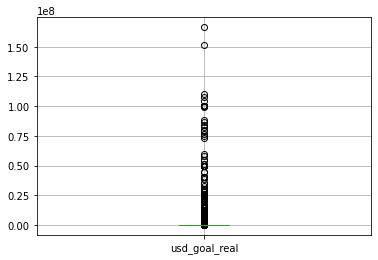

In [24]:
kickstarter_2018.boxplot(column='usd_goal_real'); 
#se observan  puntos aislados en la parte superior del gráfico.

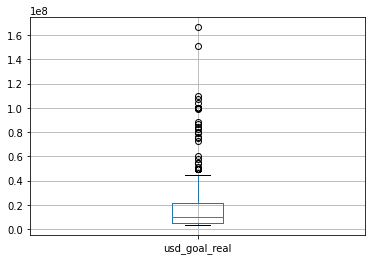

In [25]:
outliers_ugr.boxplot(column='usd_goal_real'); 
#graficamos sin los outliers

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

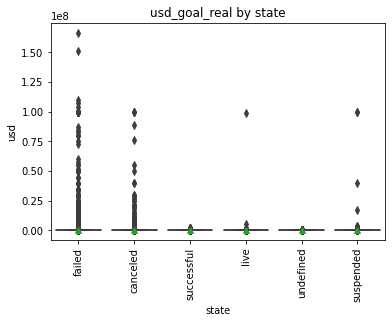

In [26]:
#Graficado en funcion de las categorias
#plt.figure(figsize=(8,4))
sns.boxplot(data=kickstarter_2018, y='usd_goal_real',showmeans=True,x='state')
plt.title("usd_goal_real by state")
plt.ylabel("usd")
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

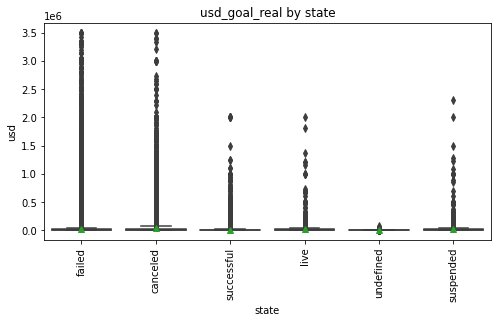

In [27]:
#Graficado en funcion de las categorias, sin los outliers
plt.figure(figsize=(8,4))
sns.boxplot(data=kickstarter_2018.drop(outliers_ugr.index), y='usd_goal_real',showmeans=True,x='state')
plt.title("usd_goal_real by state")
plt.ylabel("usd")
plt.xticks(rotation=90)

**Conclusión**: se encontraron 372 valores de usd_goal_real que se alejan de la media al menos 3veces la desviacion estandar. 

Si evaluamos la variable usd_goal_real segun la categoría, se pueden observar varios outliers que no fueron eliminados por la función 'outliers_igr'. 